In [20]:
import matplotlib.pyplot as plt
from matplotlib import ticker
import numpy as np
import scipy.io 
import sys
sys.path.append('/Users/yjzhu/Desktop/Solar/MyPy')
import pandas as pd
import cmcrameri.cm as cmcm
import juanfit

In [11]:
df_Ne = pd.read_excel("../../save/Ne_Te_diag.xlsx",sheet_name="Ne")
df_Ne

,ion,charge_state,line_pair,instrument,calibration,logNe,logNe_up_err,logNe_low_err,log_Tmax
0,Fe,viii,185/186,EIS,HPW,8.02,0.10,0.08,NaN
1,Fe,viii,185/186,EIS,GDZ,7.68,0.06,0.04,NaN
2,Mg,vii,276/280,EIS,HPW,8.02,0.18,0.16,NaN
3,Mg,vii,276/280,EIS,GDZ,8.12,0.14,0.12,NaN
4,Mg,ix,694/706,SUMER,KBr,8.48,0.30,0.20,NaN
5,Mg,ix,694/706,SUMER,Bare,8.52,0.30,0.22,NaN
6,Si,x,258/261,EIS,HPW,8.90,0.32,0.34,NaN
7,Si,x,258/261,EIS,GDZ,8.64,0.30,0.34,NaN
8,Fe,xi,182/188,EIS,HPW,9.02,0.04,0.06,NaN
9,Fe,xi,182/188,EIS,GDZ,8.78,0.08,0.06,NaN


In [124]:
df_Te = pd.read_excel("../../save/Ne_Te_diag.xlsx",sheet_name="Te")
df_Te

,ion,charge_state,line_pair,instrument,calibration,logTe,logTe_up_err,logTe_low_err,logNe
0,Fe,viii,185/253,EIS,HPW,6.05,0.03,0.02,8.0
1,Fe,viii,185/253,EIS,GDZ,5.82,0.03,0.02,8.0
2,Fe,viii,185/253,EIS,HPW,6.01,0.03,0.02,8.5
3,Fe,viii,185/253,EIS,GDZ,5.79,0.03,0.02,8.5
4,Mg,ix,706/749,SUMER,KBr,6.00,0.01,0.00,8.0
5,Mg,ix,706/749,SUMER,Bare,5.93,0.00,0.01,8.0
6,Mg,ix,706/749,SUMER,KBr,6.04,0.01,0.00,8.5
7,Mg,ix,706/749,SUMER,Bare,5.96,0.00,0.01,8.5
8,Fe,x,184/257,EIS,HPW,6.35,0.02,0.01,8.0
9,Fe,x,184/257,EIS,GDZ,5.99,0.01,0.01,8.0


In [127]:
df_Te_low = df_Te[df_Te["logNe"] == 8].reset_index()
df_Te_high = df_Te[df_Te["logNe"] == 8.5].reset_index()

In [63]:
def fork_annotate(ax,text,text_pos,sep_pos,fork_pos,**kwargs):
    if isinstance(fork_pos,(list,tuple)):
        fork_pos = np.array(fork_pos)
    ax.annotate(text,sep_pos,text_pos,**kwargs)

    xmin_fork = np.min(fork_pos[:,0])
    xmax_fork = np.max(fork_pos[:,0])

    ax.annotate("",(xmin_fork,sep_pos[1]),(xmax_fork,sep_pos[1]),**kwargs)
    for ii in range(fork_pos.shape[0]):
        ax.annotate("",(fork_pos[ii,0],sep_pos[1]),fork_pos[ii,:],**kwargs)
    

In [175]:
def updown_annotate(ax,text,text_pos,line_pos,fontsize,**kwargs):
    ax.text(text_pos[0],text_pos[1],text,fontsize=fontsize,va="center",ha="center")
    if isinstance(line_pos,(list,tuple)):
        line_pos = np.array(line_pos)
    for ii in range(line_pos.shape[0]):
        y_sep = 0.3*line_pos[ii,2] + 0.7*line_pos[ii,1]
        ax.annotate("",(text_pos[0],line_pos[ii,1]),(text_pos[0],y_sep),**kwargs)
        ax.annotate("",(line_pos[ii,0],y_sep),(line_pos[ii,0],line_pos[ii,2]),**kwargs)
        ax.annotate("",(line_pos[ii,0],y_sep),(text_pos[0],y_sep),**kwargs)
        

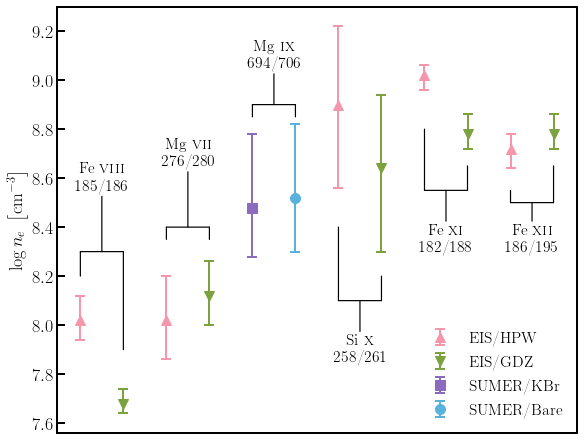

In [129]:
fig, ax = plt.subplots(figsize=(8,6),constrained_layout=True)
#colors = {"EIS":{"HPW":cmcm.batlow(0.75),"GDZ":cmcm.batlow(0.2)},"SUMER":{"KBr":cmcm.batlow(0.4),"Bare":cmcm.batlow(1)}}
colors = {"EIS":{"HPW":"#F596AA","GDZ":"#7BA23F"},"SUMER":{"KBr":"#8A6BBE","Bare":"#58B2DC"}}
markers = {"EIS":{"HPW":"^","GDZ":"v"},"SUMER":{"KBr":"s","Bare":"o"}}
leg = []
for ii, row in df_Ne.iterrows():
    ln = ax.errorbar(ii,row["logNe"],yerr=[[row["logNe_low_err"]],[row["logNe_up_err"]]],color=colors[row["instrument"]][row["calibration"]],ms=10,
    fmt=markers[row["instrument"]][row["calibration"]],elinewidth=2,capsize=5,capthick=2,label=row["instrument"]+"/"+row["calibration"])

    if ii in [0,1,4,5]:
        leg.append(ln)

fork_annotate(ax,"Fe \\textsc{viii}\n 185/186",(0.5,8.6),(0.5,8.3),((0,8.2),(1,7.9)),
arrowprops=dict(edgecolor="black",arrowstyle="-",lw=1.2,shrinkA=0,shrinkB=0),ha="center",va="center",fontsize=16)
fork_annotate(ax,"Mg \\textsc{vii}\n 276/280",(2.5,8.7),(2.5,8.4),((2,8.35),(3,8.35)),
arrowprops=dict(edgecolor="black",arrowstyle="-",lw=1.2,shrinkA=0,shrinkB=0),ha="center",va="center",fontsize=16)
fork_annotate(ax,"Mg \\textsc{ix}\n 694/706",(4.5,9.1),(4.5,8.9),((4,8.85),(5,8.85)),
arrowprops=dict(edgecolor="black",arrowstyle="-",lw=1.2,shrinkA=0,shrinkB=0),ha="center",va="center",fontsize=16)
fork_annotate(ax,"Si \\textsc{x}\n 258/261",(6.5,7.9),(6.5,8.1),((6,8.4),(7,8.2)),
arrowprops=dict(edgecolor="black",arrowstyle="-",lw=1.2,shrinkA=0,shrinkB=0),ha="center",va="center",fontsize=16)
fork_annotate(ax,"Fe \\textsc{xi}\n 182/188",(8.5,8.35),(8.5,8.55),((8,8.8),(9,8.65)),
arrowprops=dict(edgecolor="black",arrowstyle="-",lw=1.2,shrinkA=0,shrinkB=0),ha="center",va="center",fontsize=16)
fork_annotate(ax,"Fe \\textsc{xii}\n 186/195",(10.5,8.35),(10.5,8.5),((10,8.55),(11,8.65)),
arrowprops=dict(edgecolor="black",arrowstyle="-",lw=1.2,shrinkA=0,shrinkB=0),ha="center",va="center",fontsize=16)

ax.tick_params(labelsize=18)
ax.tick_params(which="major",width=2,length=8,direction="in")
ax.set_ylabel(r"$\log n_e\ \left[\mathrm{cm^{-3}}\right]$",fontsize=18)
ax.set_xticks(())
ax.legend(leg,[leg_.get_label() for leg_ in leg],loc = 'lower right',fontsize = 16,frameon=False)
plt.savefig(fname="../../figs/ms/Ne_diag.pdf",format="pdf")
#ax.set_xticklabels(['zero','one','two'])

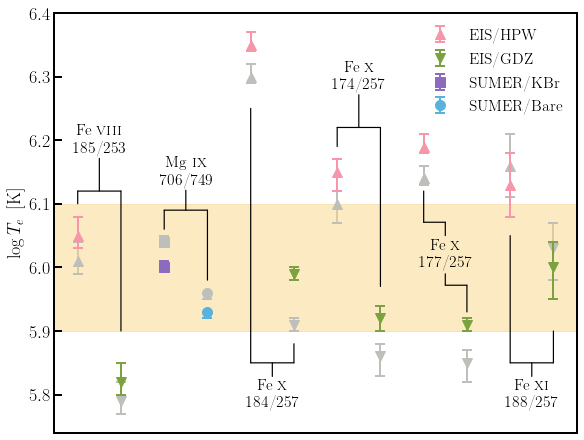

In [178]:
fig, ax = plt.subplots(figsize=(8,6),constrained_layout=True)
#colors = {"EIS":{"HPW":cmcm.batlow(0.75),"GDZ":cmcm.batlow(0.2)},"SUMER":{"KBr":cmcm.batlow(0.4),"Bare":cmcm.batlow(1)}}
colors = {"EIS":{"HPW":"#F596AA","GDZ":"#7BA23F"},"SUMER":{"KBr":"#8A6BBE","Bare":"#58B2DC"}}
markers = {"EIS":{"HPW":"^","GDZ":"v"},"SUMER":{"KBr":"s","Bare":"o"}}
leg = []
for ii, row in df_Te_low.iterrows():
    ln = ax.errorbar(ii,row["logTe"],yerr=[[row["logTe_low_err"]],[row["logTe_up_err"]]],color=colors[row["instrument"]][row["calibration"]],ms=10,
    fmt=markers[row["instrument"]][row["calibration"]],elinewidth=2,capsize=5,capthick=2,label=row["instrument"]+"/"+row["calibration"])

    if ii in [0,1,2,3]:
        leg.append(ln)

for ii, row in df_Te_high.iterrows():
    ln = ax.errorbar(ii,row["logTe"],yerr=[[row["logTe_low_err"]],[row["logTe_up_err"]]],color="#BDC0BA",ms=10,
    fmt=markers[row["instrument"]][row["calibration"]],elinewidth=2,capsize=5,capthick=2,label=row["instrument"]+"/"+row["calibration"],zorder=0)

fork_annotate(ax,"Fe \\textsc{viii}\n 185/253",(0.5,6.2),(0.5,6.12),((0,6.1),(1,5.9)),
arrowprops=dict(edgecolor="black",arrowstyle="-",lw=1.2,shrinkA=0,shrinkB=0),ha="center",va="center",fontsize=16)
fork_annotate(ax,"Mg \\textsc{ix}\n 706/749",(2.5,6.15),(2.5,6.09),((2,6.06),(3,5.98)),
arrowprops=dict(edgecolor="black",arrowstyle="-",lw=1.2,shrinkA=0,shrinkB=0),ha="center",va="center",fontsize=16)
# updown_annotate(ax,"Fe \\textsc{x}\n 184/257",(4.5,6.175),((4,6.22,6.32),(5,6.135,6.02)),fontsize=16,
# arrowprops=dict(edgecolor="black",arrowstyle="-",lw=1.2,shrinkA=0,shrinkB=0),ha="center",va="center")
fork_annotate(ax,"Fe \\textsc{x}\n 184/257",(4.5,5.8),(4.5,5.85),((4,6.25),(5,5.88)),
arrowprops=dict(edgecolor="black",arrowstyle="-",lw=1.2,shrinkA=0,shrinkB=0),ha="center",va="center",fontsize=16)
fork_annotate(ax,"Fe \\textsc{x}\n 174/257",(6.5,6.3),(6.5,6.22),((6,6.19),(7,5.97)),
arrowprops=dict(edgecolor="black",arrowstyle="-",lw=1.2,shrinkA=0,shrinkB=0),ha="center",va="center",fontsize=16)
updown_annotate(ax,"Fe \\textsc{x}\n 177/257",(8.5,6.02),((8,6.05,6.12),(9,5.99,5.93)),fontsize=16,
arrowprops=dict(edgecolor="black",arrowstyle="-",lw=1.2,shrinkA=0,shrinkB=0),ha="center",va="center")
fork_annotate(ax,"Fe \\textsc{xi}\n 188/257",(10.5,5.8),(10.5,5.85),((10,6.05),(11,5.9)),
arrowprops=dict(edgecolor="black",arrowstyle="-",lw=1.2,shrinkA=0,shrinkB=0),ha="center",va="center",fontsize=16)

ax.axhspan(5.9,6.1,color="#FAD689",alpha=0.5,zorder=0)

ax.tick_params(labelsize=18)
ax.tick_params(which="major",width=2,length=8,direction="in")
ax.set_ylabel(r"$\log T_e\ \left[\mathrm{K}\right]$",fontsize=18)
ax.set_xticks(())
ax.legend(leg,[leg_.get_label() for leg_ in leg],loc = 'upper right',fontsize = 16,frameon=False)
plt.savefig(fname="../../figs/ms/Te_diag.pdf",format="pdf")

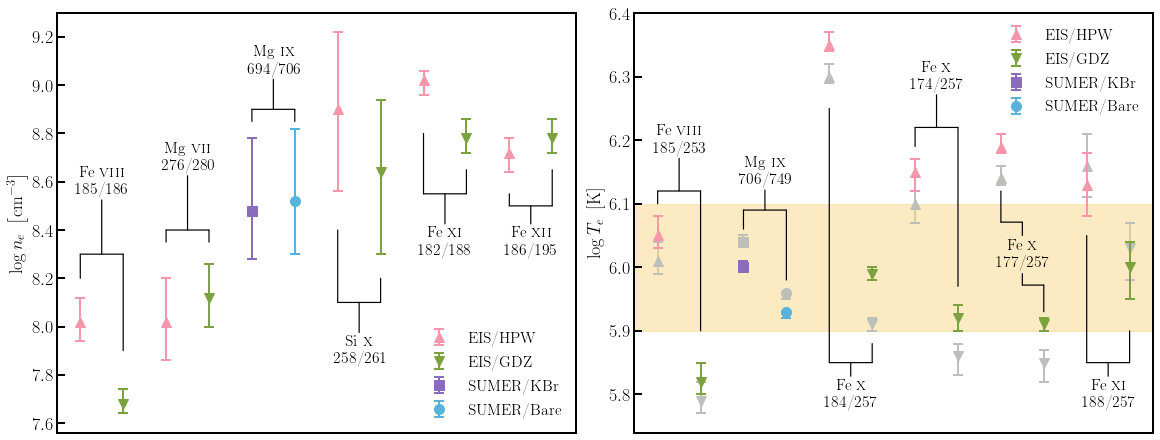

In [186]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,6),constrained_layout=True)
colors = {"EIS":{"HPW":"#F596AA","GDZ":"#7BA23F"},"SUMER":{"KBr":"#8A6BBE","Bare":"#58B2DC"}}
markers = {"EIS":{"HPW":"^","GDZ":"v"},"SUMER":{"KBr":"s","Bare":"o"}}

leg = []
for ii, row in df_Ne.iterrows():
    ln = ax1.errorbar(ii,row["logNe"],yerr=[[row["logNe_low_err"]],[row["logNe_up_err"]]],color=colors[row["instrument"]][row["calibration"]],ms=10,
    fmt=markers[row["instrument"]][row["calibration"]],elinewidth=2,capsize=5,capthick=2,label=row["instrument"]+"/"+row["calibration"])

    if ii in [0,1,4,5]:
        leg.append(ln)

fork_annotate(ax1,"Fe \\textsc{viii}\n 185/186",(0.5,8.6),(0.5,8.3),((0,8.2),(1,7.9)),
arrowprops=dict(edgecolor="black",arrowstyle="-",lw=1.2,shrinkA=0,shrinkB=0),ha="center",va="center",fontsize=16)
fork_annotate(ax1,"Mg \\textsc{vii}\n 276/280",(2.5,8.7),(2.5,8.4),((2,8.35),(3,8.35)),
arrowprops=dict(edgecolor="black",arrowstyle="-",lw=1.2,shrinkA=0,shrinkB=0),ha="center",va="center",fontsize=16)
fork_annotate(ax1,"Mg \\textsc{ix}\n 694/706",(4.5,9.1),(4.5,8.9),((4,8.85),(5,8.85)),
arrowprops=dict(edgecolor="black",arrowstyle="-",lw=1.2,shrinkA=0,shrinkB=0),ha="center",va="center",fontsize=16)
fork_annotate(ax1,"Si \\textsc{x}\n 258/261",(6.5,7.9),(6.5,8.1),((6,8.4),(7,8.2)),
arrowprops=dict(edgecolor="black",arrowstyle="-",lw=1.2,shrinkA=0,shrinkB=0),ha="center",va="center",fontsize=16)
fork_annotate(ax1,"Fe \\textsc{xi}\n 182/188",(8.5,8.35),(8.5,8.55),((8,8.8),(9,8.65)),
arrowprops=dict(edgecolor="black",arrowstyle="-",lw=1.2,shrinkA=0,shrinkB=0),ha="center",va="center",fontsize=16)
fork_annotate(ax1,"Fe \\textsc{xii}\n 186/195",(10.5,8.35),(10.5,8.5),((10,8.55),(11,8.65)),
arrowprops=dict(edgecolor="black",arrowstyle="-",lw=1.2,shrinkA=0,shrinkB=0),ha="center",va="center",fontsize=16)
ax1.legend(leg,[leg_.get_label() for leg_ in leg],loc = 'lower right',fontsize = 16,frameon=False)
ax1.set_ylabel(r"$\log n_e\ \left[\mathrm{cm^{-3}}\right]$",fontsize=18)

leg = []
for ii, row in df_Te_low.iterrows():
    ln = ax2.errorbar(ii,row["logTe"],yerr=[[row["logTe_low_err"]],[row["logTe_up_err"]]],color=colors[row["instrument"]][row["calibration"]],ms=10,
    fmt=markers[row["instrument"]][row["calibration"]],elinewidth=2,capsize=5,capthick=2,label=row["instrument"]+"/"+row["calibration"])

    if ii in [0,1,2,3]:
        leg.append(ln)

for ii, row in df_Te_high.iterrows():
    ln = ax2.errorbar(ii,row["logTe"],yerr=[[row["logTe_low_err"]],[row["logTe_up_err"]]],color="#BDC0BA",ms=10,
    fmt=markers[row["instrument"]][row["calibration"]],elinewidth=2,capsize=5,capthick=2,label=row["instrument"]+"/"+row["calibration"],zorder=0)

fork_annotate(ax2,"Fe \\textsc{viii}\n 185/253",(0.5,6.2),(0.5,6.12),((0,6.1),(1,5.9)),
arrowprops=dict(edgecolor="black",arrowstyle="-",lw=1.2,shrinkA=0,shrinkB=0),ha="center",va="center",fontsize=16)
fork_annotate(ax2,"Mg \\textsc{ix}\n 706/749",(2.5,6.15),(2.5,6.09),((2,6.06),(3,5.98)),
arrowprops=dict(edgecolor="black",arrowstyle="-",lw=1.2,shrinkA=0,shrinkB=0),ha="center",va="center",fontsize=16)
# updown_annotate(ax,"Fe \\textsc{x}\n 184/257",(4.5,6.175),((4,6.22,6.32),(5,6.135,6.02)),fontsize=16,
# arrowprops=dict(edgecolor="black",arrowstyle="-",lw=1.2,shrinkA=0,shrinkB=0),ha="center",va="center")
fork_annotate(ax2,"Fe \\textsc{x}\n 184/257",(4.5,5.8),(4.5,5.85),((4,6.25),(5,5.88)),
arrowprops=dict(edgecolor="black",arrowstyle="-",lw=1.2,shrinkA=0,shrinkB=0),ha="center",va="center",fontsize=16)
fork_annotate(ax2,"Fe \\textsc{x}\n 174/257",(6.5,6.3),(6.5,6.22),((6,6.19),(7,5.97)),
arrowprops=dict(edgecolor="black",arrowstyle="-",lw=1.2,shrinkA=0,shrinkB=0),ha="center",va="center",fontsize=16)
updown_annotate(ax2,"Fe \\textsc{x}\n 177/257",(8.5,6.02),((8,6.05,6.12),(9,5.99,5.93)),fontsize=16,
arrowprops=dict(edgecolor="black",arrowstyle="-",lw=1.2,shrinkA=0,shrinkB=0),ha="center",va="center")
fork_annotate(ax2,"Fe \\textsc{xi}\n 188/257",(10.5,5.8),(10.5,5.85),((10,6.05),(11,5.9)),
arrowprops=dict(edgecolor="black",arrowstyle="-",lw=1.2,shrinkA=0,shrinkB=0),ha="center",va="center",fontsize=16)

ax2.axhspan(5.9,6.1,color="#FAD689",alpha=0.5,zorder=0)
ax2.set_ylabel(r"$\log T_e\ \left[\mathrm{K}\right]$",fontsize=18)
ax2.legend(leg,[leg_.get_label() for leg_ in leg],loc = 'upper right',fontsize = 16,frameon=False)


for ax_ in (ax1,ax2):
    ax_.tick_params(labelsize=18)
    ax_.tick_params(which="major",width=2,length=8,direction="in")
    ax_.set_xticks(())

plt.savefig(fname="../../figs/ms/NeTe_diag.pdf",format="pdf")
